In [1]:
import scanpy as sc
import os
import math
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
sc.settings.set_figure_params(dpi_save=600,  frameon=False, transparent=True, fontsize=10)
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read('./Fig4_raw.h5ad')
adata

AnnData object with n_obs × n_vars = 71159 × 299
    obs: 'Prediction', 'Probability', 'batch', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'UMAP1', 'UMAP2', 'Celltype', 'Age', 'Stage', 'bigtype', 'Prebigtype', 'Precelltype'
    var: 'pathway_index'

In [3]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [4]:
adata.obs.cancer.value_counts()

KIDNEY    28930
UCEC       9816
ESCA       8154
MYE        7861
THCA       5939
OV-FTC     4002
PAAD       3093
CRC        2725
LYM         639
Name: cancer, dtype: int64

In [5]:
adata.obs.bigtype.value_counts()

Macro    27247
Mono     24342
cDC      14916
Mast      3868
pDC        786
Name: bigtype, dtype: int64

In [6]:
adata.obs.Celltype.value_counts()

Mono_CD14        11520
Mono_CD16        11214
cDC2_CD1C         8042
Macro_C1QC        7927
Macro_NLRP3       3903
Mast_KIT          3868
Macro_LYVE1       3419
Macro_SPP1        3279
Macro_IL1B        2363
Macro_GPNMB       2264
Macro_INHBA       2047
cDC2_CXCR4hi      1851
Mono_CD14CD16     1608
Macro_FN1         1319
cDC2_CD1A         1209
cDC2_IL1B         1208
pDC_LILRA4         786
cDC3_LAMP3         740
Macro_ISG15        726
cDC2_FCN1          720
cDC1_CLEC9A        673
cDC2_ISG15         302
cDC2_CXCL9         171
Name: Celltype, dtype: int64

<AxesSubplot: title={'center': 'Precelltype'}, xlabel='UMAP1', ylabel='UMAP2'>

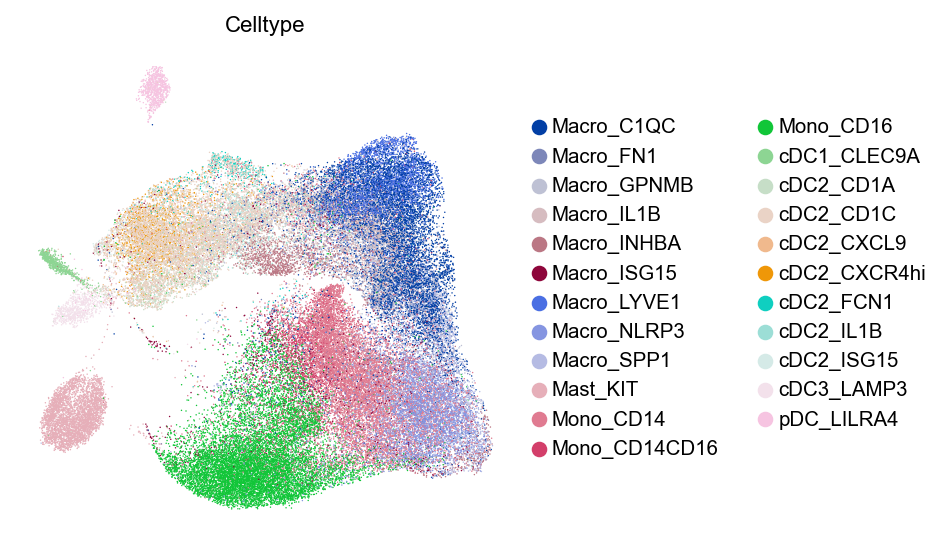

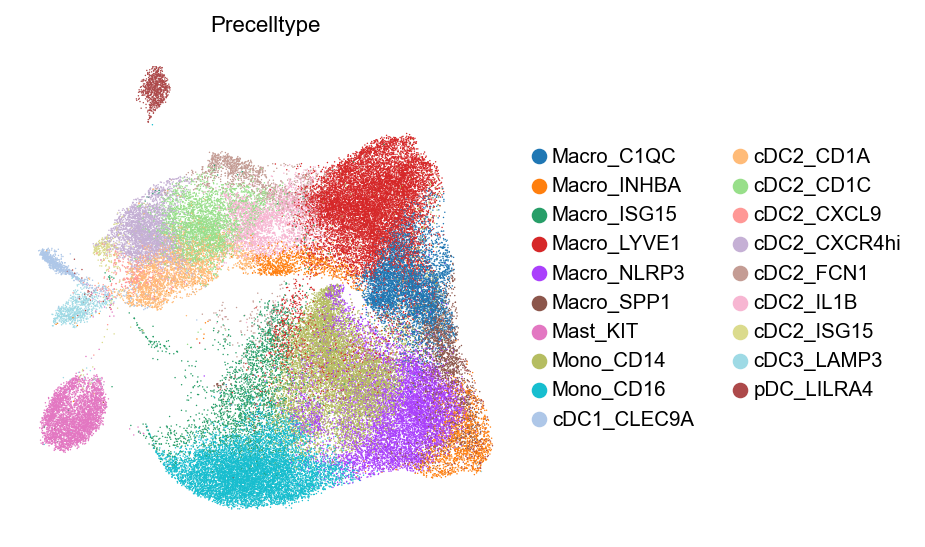

In [7]:
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color='Celltype',edgecolor="none",show=False)
sc.pl.umap(adata, color='Precelltype',edgecolor="none",show=False)

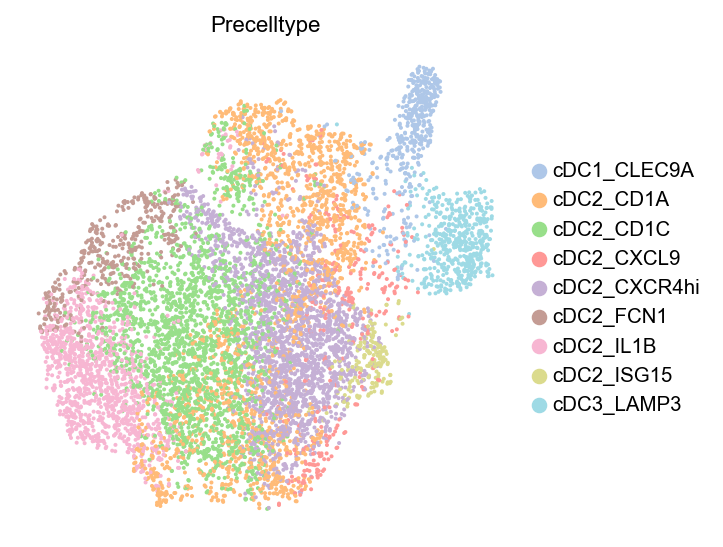

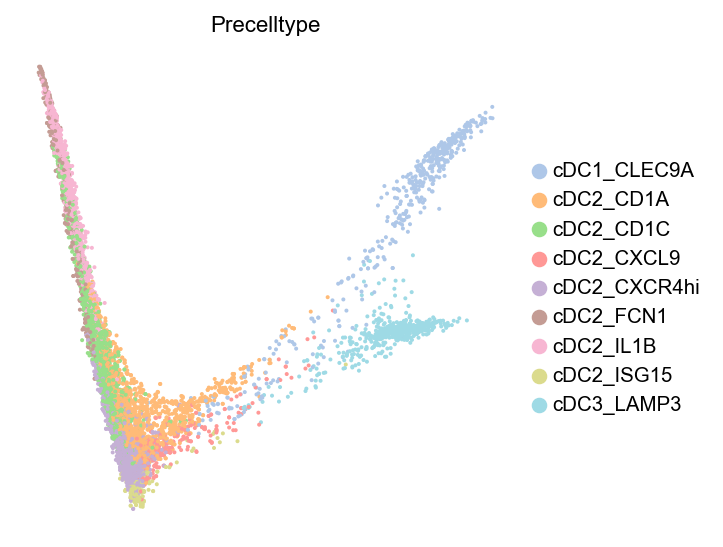

In [8]:
sub = adata[adata.obs.Prebigtype=='cDC',:]
sub = sub[sub.obs.bigtype=='cDC',:]
sub = sub[sub.obs.tissue=='T',:]
sc.pp.scale(sub, max_value=10)
sc.tl.pca(sub, svd_solver='arpack')
sc.pp.neighbors(sub, n_neighbors=10, n_pcs=40)
sc.tl.umap(sub)
sc.pl.umap(sub, color='Precelltype')
sc.tl.diffmap(sub)
sub.uns['iroot'] = np.flatnonzero(sub.obs['Precelltype']  == 'cDC3_LAMP3')[5]
sc.tl.dpt(sub)
sc.pl.diffmap(sub, color='Precelltype')

<Axes: >

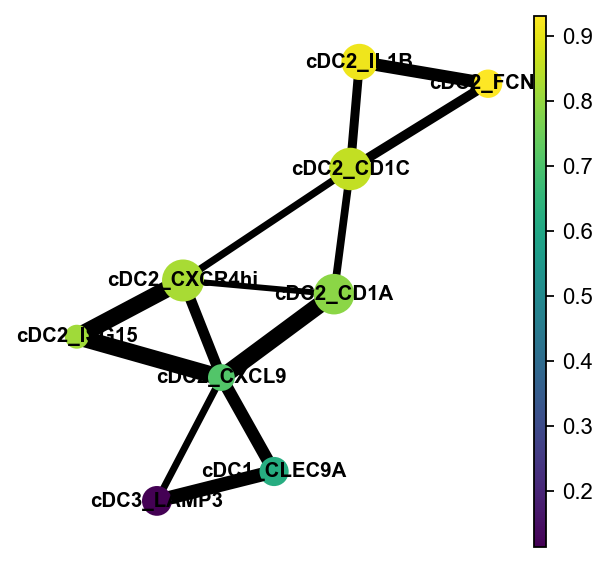

In [9]:
sc.tl.paga(sub, groups='Precelltype')
sc.pl.paga(sub, threshold=0.3, show=False,color='dpt_pseudotime')

In [10]:
sc.tl.rank_genes_groups(sub, 'Precelltype', method='wilcoxon')
dc_pathway = pd.DataFrame(sub.uns['rank_genes_groups']['names'])
dc_pathway

,cDC1_CLEC9A,cDC2_CD1A,cDC2_CD1C,cDC2_CXCL9,cDC2_CXCR4hi,cDC2_FCN1,cDC2_IL1B,cDC2_ISG15,cDC3_LAMP3
0,REACTOME_PI3K_EVENTS_IN_ERBB2_SIGNALING,REACTOME_GLUTATHIONE_CONJUGATION,REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...,REACTOME_A_TETRASACCHARIDE_LINKER_SEQUENCE_IS_...,REACTOME_SIGNALLING_TO_ERKS,REACTOME_G2_M_CHECKPOINTS,REACTOME_HEPARAN_SULFATE_HEPARIN_HS_GAG_METABO...,REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK,REACTOME_REGULATION_OF_MRNA_STABILITY_BY_PROTE...
1,REACTOME_GLYCOLYSIS,REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVAT...,REACTOME_TRANSPORT_OF_MATURE_TRANSCRIPT_TO_CYT...,REACTOME_TCR_SIGNALING,REACTOME_SIGNALING_BY_BMP,REACTOME_LIPID_DIGESTION_MOBILIZATION_AND_TRAN...,REACTOME_ACTIVATED_TLR4_SIGNALLING,REACTOME_P75_NTR_RECEPTOR_MEDIATED_SIGNALLING,REACTOME_ACTIVATION_OF_CHAPERONE_GENES_BY_XBP1S
2,REACTOME_P75_NTR_RECEPTOR_MEDIATED_SIGNALLING,REACTOME_A_TETRASACCHARIDE_LINKER_SEQUENCE_IS_...,REACTOME_HOST_INTERACTIONS_OF_HIV_FACTORS,REACTOME_OPIOID_SIGNALLING,REACTOME_CLASS_B_2_SECRETIN_FAMILY_RECEPTORS,REACTOME_INFLAMMASOMES,REACTOME_TRANSCRIPTIONAL_REGULATION_OF_WHITE_A...,REACTOME_OPIOID_SIGNALLING,REACTOME_SIGNALING_BY_FGFR1_MUTANTS
3,REACTOME_INTEGRATION_OF_ENERGY_METABOLISM,REACTOME_GAB1_SIGNALOSOME,REACTOME_ERKS_ARE_INACTIVATED,REACTOME_RECRUITMENT_OF_MITOTIC_CENTROSOME_PRO...,REACTOME_LATE_PHASE_OF_HIV_LIFE_CYCLE,REACTOME_APOPTOSIS,REACTOME_SIGNALING_BY_INSULIN_RECEPTOR,REACTOME_CLASS_B_2_SECRETIN_FAMILY_RECEPTORS,REACTOME_APOPTOTIC_CLEAVAGE_OF_CELLULAR_PROTEINS
4,REACTOME_BIOLOGICAL_OXIDATIONS,REACTOME_DOWNSTREAM_TCR_SIGNALING,REACTOME_INITIAL_TRIGGERING_OF_COMPLEMENT,REACTOME_APOPTOTIC_CLEAVAGE_OF_CELLULAR_PROTEINS,REACTOME_APC_C_CDC20_MEDIATED_DEGRADATION_OF_M...,REACTOME_PHASE_II_CONJUGATION,REACTOME_DNA_REPLICATION,REACTOME_REGULATION_OF_KIT_SIGNALING,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...
...,...,...,...,...,...,...,...,...,...
294,REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...,REACTOME_MAPK_TARGETS_NUCLEAR_EVENTS_MEDIATED_...,REACTOME_REGULATION_OF_MRNA_STABILITY_BY_PROTE...,REACTOME_GLUCOSE_METABOLISM,REACTOME_ACTIVATION_OF_BH3_ONLY_PROTEINS,REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK,REACTOME_REGULATION_OF_IFNA_SIGNALING,REACTOME_ERKS_ARE_INACTIVATED,REACTOME_APC_C_CDC20_MEDIATED_DEGRADATION_OF_M...
295,REACTOME_MYD88_MAL_CASCADE_INITIATED_ON_PLASMA...,REACTOME_THE_NLRP3_INFLAMMASOME,REACTOME_A_TETRASACCHARIDE_LINKER_SEQUENCE_IS_...,REACTOME_S_PHASE,REACTOME_SIGNALING_BY_RHO_GTPASES,REACTOME_TCR_SIGNALING,REACTOME_TRANSCRIPTIONAL_ACTIVITY_OF_SMAD2_SMA...,REACTOME_RESPONSE_TO_ELEVATED_PLATELET_CYTOSOL...,REACTOME_LATE_PHASE_OF_HIV_LIFE_CYCLE
296,REACTOME_HIV_LIFE_CYCLE,REACTOME_PHASE_II_CONJUGATION,REACTOME_INTEGRATION_OF_ENERGY_METABOLISM,REACTOME_ACTIVATED_TLR4_SIGNALLING,REACTOME_SYNTHESIS_OF_PIPS_AT_THE_PLASMA_MEMBRANE,REACTOME_A_TETRASACCHARIDE_LINKER_SEQUENCE_IS_...,REACTOME_ACTIVATION_OF_NF_KAPPAB_IN_B_CELLS,REACTOME_PI3K_AKT_ACTIVATION,REACTOME_CHOLESTEROL_BIOSYNTHESIS
297,REACTOME_NOD1_2_SIGNALING_PATHWAY,REACTOME_SIGNALING_BY_NOTCH,REACTOME_PI3K_EVENTS_IN_ERBB2_SIGNALING,REACTOME_HOST_INTERACTIONS_OF_HIV_FACTORS,REACTOME_TRANSCRIPTIONAL_REGULATION_OF_WHITE_A...,REACTOME_RECRUITMENT_OF_MITOTIC_CENTROSOME_PRO...,REACTOME_REGULATION_OF_SIGNALING_BY_CBL,REACTOME_ERK_MAPK_TARGETS,REACTOME_POTASSIUM_CHANNELS


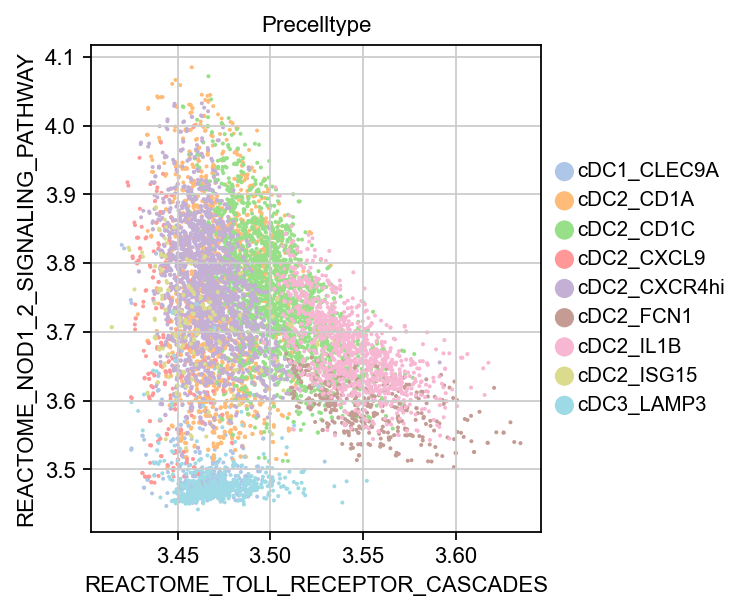

In [11]:
sc.pl.scatter(sub,x='REACTOME_TOLL_RECEPTOR_CASCADES',y='REACTOME_NOD1_2_SIGNALING_PATHWAY',color='Precelltype',use_raw=True)

In [12]:
sub = adata[adata.obs.Celltype=='Macro_LYVE1',:]
sc.tl.rank_genes_groups(sub, 'cancer', method='wilcoxon')
txt = pd.DataFrame(sub.uns['rank_genes_groups']['names']).head(10)
txt

,ESCA,KIDNEY,THCA,UCEC
0,REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM,REACTOME_P75_NTR_RECEPTOR_MEDIATED_SIGNALLING,REACTOME_KERATAN_SULFATE_KERATIN_METABOLISM,REACTOME_ACTIVATION_OF_ATR_IN_RESPONSE_TO_REPL...
1,REACTOME_SIGNALING_BY_INSULIN_RECEPTOR,REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK,REACTOME_APC_C_CDC20_MEDIATED_DEGRADATION_OF_M...,REACTOME_NOD1_2_SIGNALING_PATHWAY
2,REACTOME_APOPTOTIC_EXECUTION_PHASE,REACTOME_INTEGRATION_OF_ENERGY_METABOLISM,REACTOME_PI_3K_CASCADE,REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSI...
3,REACTOME_GLUCOSE_METABOLISM,REACTOME_BIOLOGICAL_OXIDATIONS,REACTOME_BOTULINUM_NEUROTOXICITY,REACTOME_TELOMERE_MAINTENANCE
4,REACTOME_G2_M_CHECKPOINTS,REACTOME_BASIGIN_INTERACTIONS,REACTOME_DEGRADATION_OF_THE_EXTRACELLULAR_MATRIX,REACTOME_CHOLESTEROL_BIOSYNTHESIS
5,REACTOME_INFLAMMASOMES,REACTOME_MITOTIC_M_M_G1_PHASES,REACTOME_SIGNALLING_TO_RAS,REACTOME_MITOTIC_PROMETAPHASE
6,REACTOME_INNATE_IMMUNE_SYSTEM,REACTOME_RNA_POL_I_TRANSCRIPTION,REACTOME_ACTIVATION_OF_ATR_IN_RESPONSE_TO_REPL...,REACTOME_POTASSIUM_CHANNELS
7,REACTOME_METABOLISM_OF_CARBOHYDRATES,REACTOME_RECRUITMENT_OF_MITOTIC_CENTROSOME_PRO...,REACTOME_HEPARAN_SULFATE_HEPARIN_HS_GAG_METABO...,REACTOME_ANTIGEN_PROCESSING_UBIQUITINATION_PRO...
8,REACTOME_SIGNALING_BY_FGFR1_MUTANTS,REACTOME_CHEMOKINE_RECEPTORS_BIND_CHEMOKINES,REACTOME_CYCLIN_A_B1_ASSOCIATED_EVENTS_DURING_...,REACTOME_LATE_PHASE_OF_HIV_LIFE_CYCLE
9,REACTOME_HIV_LIFE_CYCLE,REACTOME_DIABETES_PATHWAYS,REACTOME_PACKAGING_OF_TELOMERE_ENDS,REACTOME_AMYLOIDS


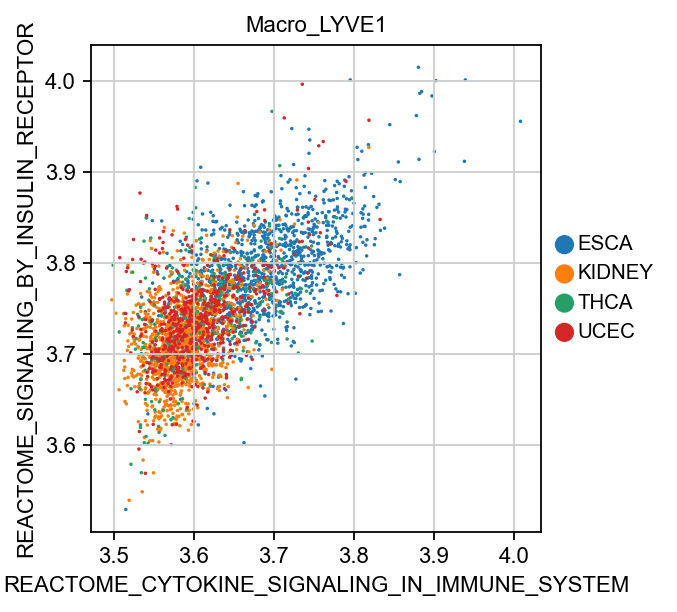

In [13]:
sc.pl.scatter(sub, x='REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM', y='REACTOME_SIGNALING_BY_INSULIN_RECEPTOR', 
              color='cancer', size=10, title='Macro_LYVE1',use_raw=True)

In [14]:
from scipy.stats import spearmanr, pearsonr
sub = adata[adata.obs.Celltype=='Macro_LYVE1',:]
sub = sub[sub.obs.cancer=='ESCA',:]
rcc = pd.DataFrame(sub.var['pathway_index'])
rcc['rcc'] = 0
rcc['p'] = 0
for i in range(len(rcc)):
    rr = spearmanr(sub.obs.Stage,sub.X[:,i])
    rcc.loc[rcc.index[i],'rcc'] = rr[0]
    rcc.loc[rcc.index[i],'p'] = rr[1]
rcc.sort_values(by='rcc', ascending=False)

,pathway_index,rcc,p
0,,,
REACTOME_SIGNALING_BY_FGFR,nan,0.286297,2.165642e-24
REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION,nan,0.225881,1.521873e-15
REACTOME_LIPID_DIGESTION_MOBILIZATION_AND_TRANSPORT,nan,0.216060,2.540471e-14
REACTOME_COMPLEMENT_CASCADE,nan,0.193828,9.128683e-12
REACTOME_S_PHASE,nan,0.183460,1.130996e-10
...,...,...,...
REACTOME_FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEVELOPMENT_AND_PLATELET_PRODUCTION,nan,-0.244800,4.580482e-18
REACTOME_IL_3_5_AND_GM_CSF_SIGNALING,nan,-0.246782,2.421084e-18
REACTOME_INTERFERON_ALPHA_BETA_SIGNALING,nan,-0.270107,8.641323e-22


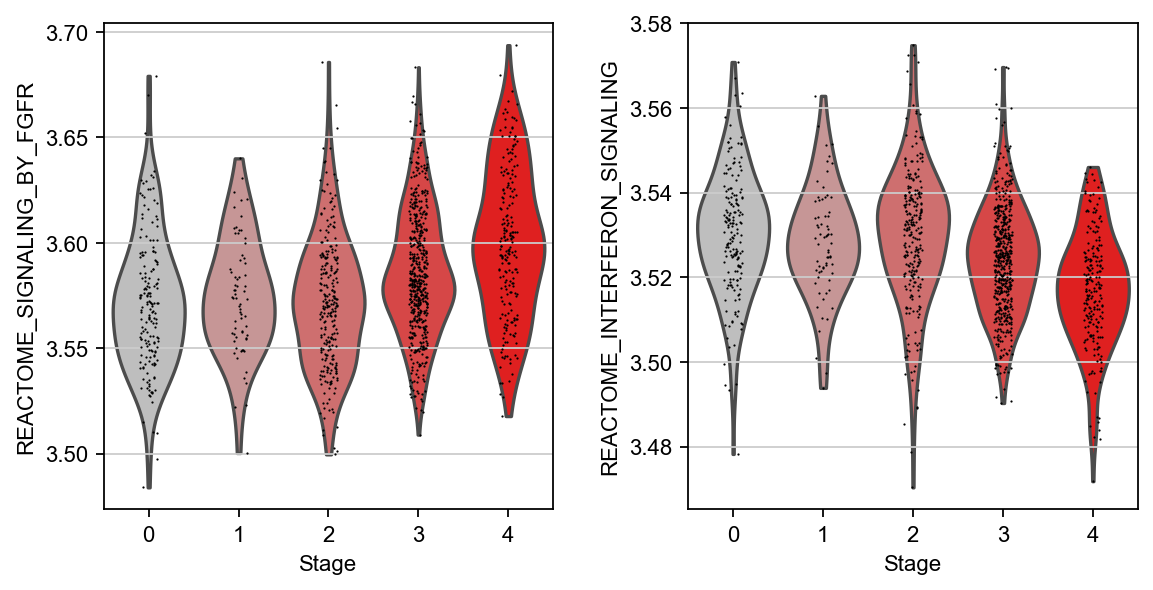

In [15]:
sub.obs.Stage = sub.obs.Stage.astype('category')
sub.uns['Stage_colors'] = ["#BEBEBE", "#CE8E8E", "#DE5F5F" ,"#EE2F2F", "#FF0000"]
sc.pl.violin(sub, ['REACTOME_SIGNALING_BY_FGFR','REACTOME_INTERFERON_SIGNALING'], groupby='Stage',use_raw=True)

In [16]:
from scipy.stats import spearmanr, pearsonr
sub = adata[adata.obs.Precelltype=='Mono_CD14',:]
rcc = pd.DataFrame(sub.var['pathway_index'])
rcc['rcc'] = 0
rcc['p'] = 0
for i in range(len(rcc)):
    rr = spearmanr(sub.obs.Age,sub.X[:,i])
    rcc.loc[rcc.index[i],'rcc'] = rr[0]
    rcc.loc[rcc.index[i],'p'] = rr[1]
rcc = rcc.sort_values(by='rcc', ascending=False)
rcc

,pathway_index,rcc,p
0,,,
REACTOME_AQUAPORIN_MEDIATED_TRANSPORT,nan,0.394185,0.000000e+00
REACTOME_NUCLEOTIDE_LIKE_PURINERGIC_RECEPTORS,nan,0.388845,0.000000e+00
REACTOME_GRB2_EVENTS_IN_ERBB2_SIGNALING,nan,0.375638,1.233719e-296
REACTOME_REGULATION_OF_SIGNALING_BY_CBL,nan,0.372682,1.176088e-291
REACTOME_GOLGI_ASSOCIATED_VESICLE_BIOGENESIS,nan,0.372580,1.742081e-291
...,...,...,...
REACTOME_S_PHASE,nan,-0.409079,0.000000e+00
REACTOME_INNATE_IMMUNE_SYSTEM,nan,-0.421126,0.000000e+00
REACTOME_LIPOPROTEIN_METABOLISM,nan,-0.463920,0.000000e+00


In [17]:
rcc[0:20]

,pathway_index,rcc,p
0,,,
REACTOME_AQUAPORIN_MEDIATED_TRANSPORT,nan,0.394185,0.000000e+00
REACTOME_NUCLEOTIDE_LIKE_PURINERGIC_RECEPTORS,nan,0.388845,0.000000e+00
REACTOME_GRB2_EVENTS_IN_ERBB2_SIGNALING,nan,0.375638,1.233719e-296
REACTOME_REGULATION_OF_SIGNALING_BY_CBL,nan,0.372682,1.176088e-291
REACTOME_GOLGI_ASSOCIATED_VESICLE_BIOGENESIS,nan,0.372580,1.742081e-291
REACTOME_IL_3_5_AND_GM_CSF_SIGNALING,nan,0.371552,9.112541e-290
REACTOME_NEPHRIN_INTERACTIONS,nan,0.348702,3.772819e-253
REACTOME_APOPTOTIC_CLEAVAGE_OF_CELLULAR_PROTEINS,nan,0.348380,1.179925e-252
REACTOME_TRAF6_MEDIATED_INDUCTION_OF_NFKB_AND_MAP_KINASES_UPON_TLR7_8_OR_9_ACTIVATION,nan,0.345213,8.044532e-248


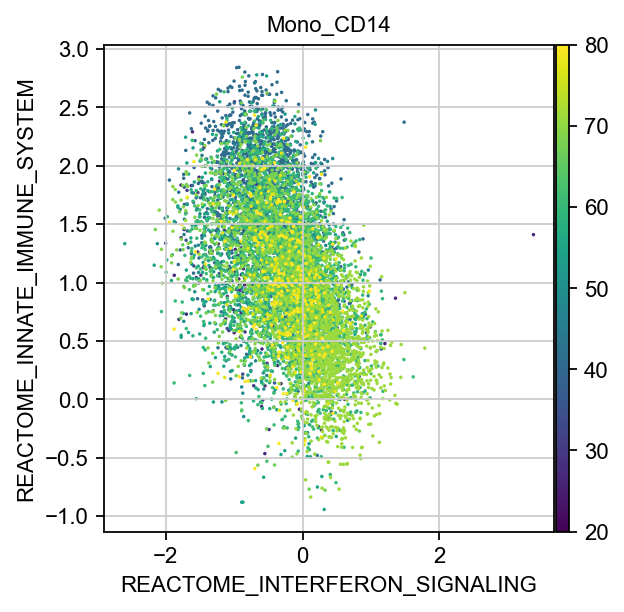

In [18]:
sc.pl.scatter(sub, x='REACTOME_INTERFERON_SIGNALING', y='REACTOME_INNATE_IMMUNE_SYSTEM', 
              color='Age', size=10, title='Mono_CD14',use_raw=False)

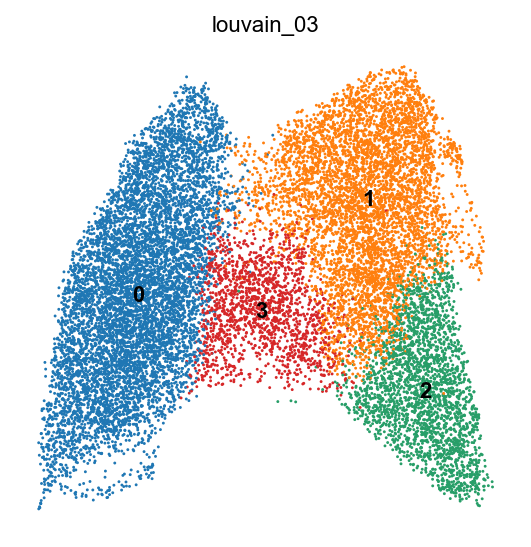

In [19]:
sub = adata[adata.obs.Prebigtype=='Mono',:]
#sc.pp.scale(sub, max_value=10)
sc.tl.pca(sub, svd_solver='arpack')
sc.pp.neighbors(sub, n_neighbors=10, n_pcs=50)
sc.tl.umap(sub)
sc.tl.louvain(sub,resolution=0.3, key_added='louvain_03')
sc.pl.umap(sub, color='louvain_03', legend_loc='on data', frameon=False, legend_fontsize=10,title='louvain_03')


In [20]:
adata.write_h5ad('./Fig4.h5ad')